# Assignment 2: Clustering

<b>Objective:</b> The primary objective of this assignment is to understand and implement different clustering techniques for customer segmentation. You are required to interpret the significance of the clusters formed and provide actionable insights.

<b>Data:</b> You will be using the Customer Segmentation Dataset available here: https://www.kaggle.com/datasets/hashemi221022/customer-segmentation-data/data 

In [113]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## Part 1: Data Preprocessing

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

In [114]:
# Read the Customer Segmentation Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Lily-QianWang/schulich_data_science/main/Customer_Data.csv')

In [115]:
# Create DataFrame
df = pd.DataFrame(data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [116]:
# Data analysis
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [117]:
# Cheking the dataset and finding missing values(number & location)
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [118]:
# Removing missing values
df2 = df.dropna()
df2

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717  

In [119]:
# Cheking the dataset to ensure the removal of missing values
df2.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [120]:
df2.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [121]:
# Remove column of ID
df3 = df2.drop('CUST_ID', axis=1)
df3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

## Part 2: Exploratory Data Analysis
- Perform an EDA to understand the data and identify patterns that could inform the clustering.
- Explain your findings.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


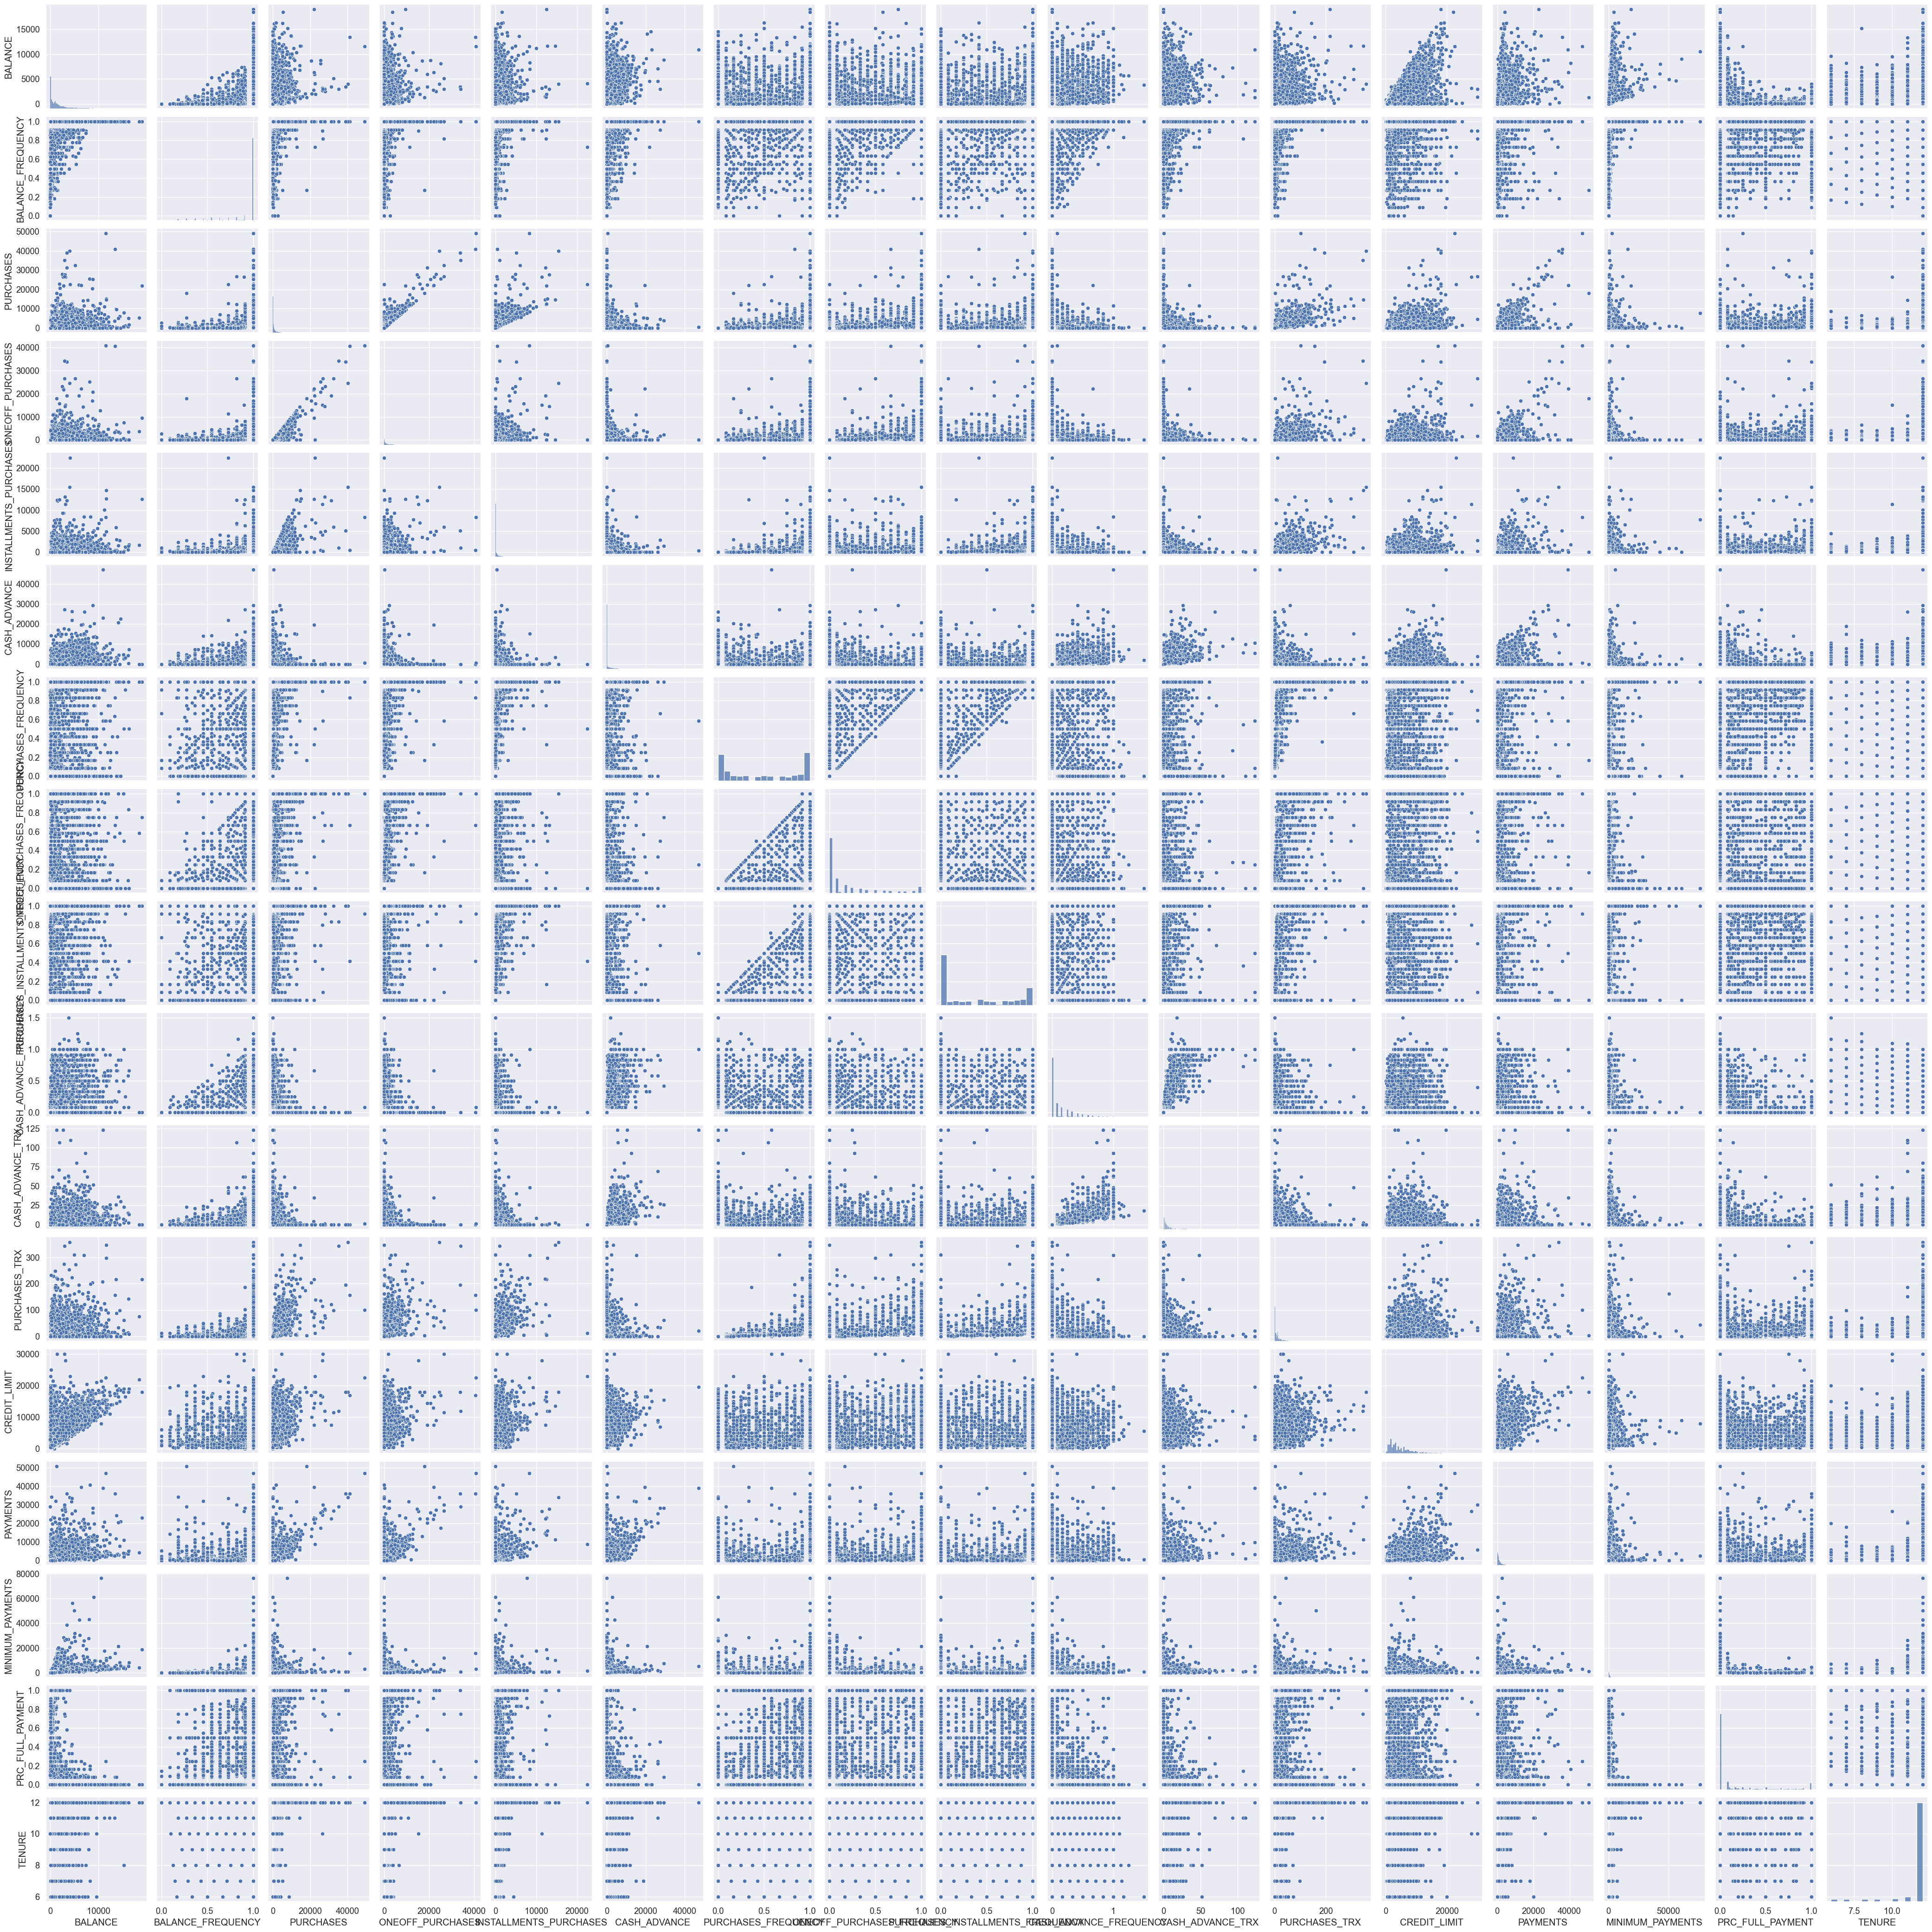

In [122]:
# Visualizing numerical columns
sns.pairplot(df3)

In [123]:
X = pd.DataFrame(df3, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [124]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [125]:
num_cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

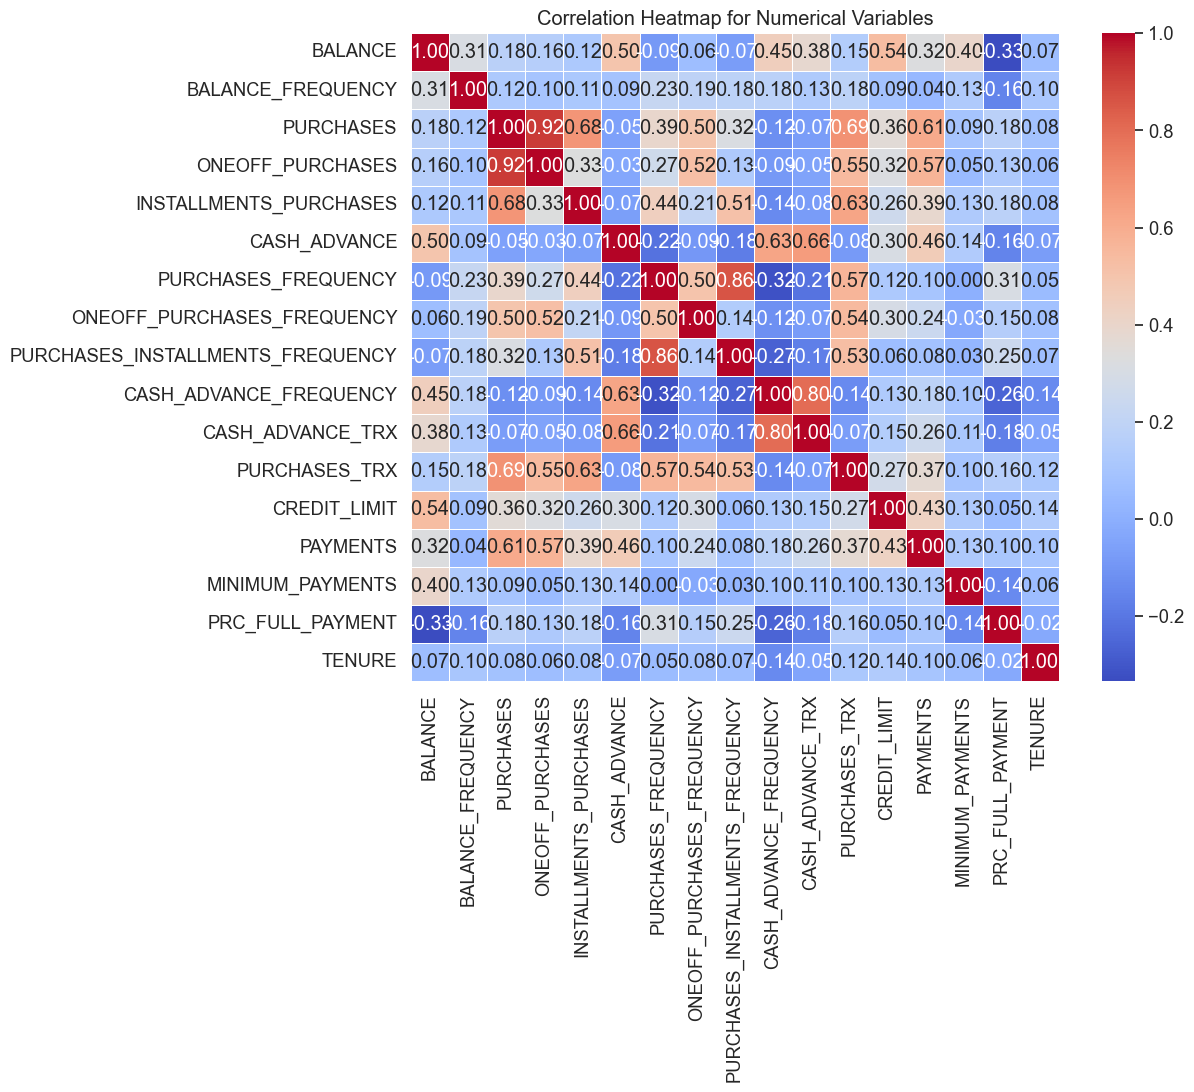

In [126]:
# Calculate the correlation matrix
correlation_matrix = df3[num_cols].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", square=True)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Considering both the pairplot, correlation heatmap and personal interest, the variables ['PURCHASES', 'PAYMENTS', 'CASH_ADVANCE', 'BALANCE'] were chosen for evaluating the differentiation among customer clusters. 

This selection allows for a focused analysis of purchasing behavior, payment patterns, cash advance usage, and account balances. By examining how these variables vary across clusters, we can discern the most significant features that distinguish one cluster from another. This targeted approach ensures a detailed understanding of customer segmentation, enabling businesses to tailor their strategies and offerings effectively.

## Part 3: Clustering Algorithms

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

In [127]:
# Normalized
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df3)
df4 = pd.DataFrame(scaled, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY	', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [128]:
X = pd.DataFrame(df4, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY	', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [129]:
# Created trian and test
X_train, X_test = train_test_split(X, random_state=0, test_size=.2)

In [130]:
X_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3448 -0.169549           0.505405   2.225729          1.922817   
5717  0.650054           0.505405  -0.225873         -0.040928   
5722  5.810758           0.505405  -0.473208         -0.359160   
5118 -0.762910          -3.871857  -0.440905         -0.317598   
8090 -0.753087           0.505405  -0.300156         -0.359160   
...        ...                ...        ...               ...   
4373  1.264734           0.505405  -0.473208         -0.359160   
7891 -0.515951          -0.807773  -0.473208         -0.359160   
4859 -0.753225          -0.297095  -0.394297         -0.359160   
3264  1.032937           0.505405  -0.473208         -0.359160   
2732 -0.754880           0.505405  -0.367107         -0.359160   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY\t  \
3448                1.727421     -0.468655               1.256077   
5717               -0.458839     -0.450293               0.633023   
5722               -0.458839      0.321059              -1.236139   
5118               -0.458839     -0.468655              -1.028455   
8090               -0.049982     -0.468655               1.256077   
...                      ...           ...                    ...   
4373               -0.458839      0.624508              -1.236139   
7891               -0.458839      0.572901              -1.236139   
4859               -0.272400     -0.468655               0.840707   
3264               -0.458839      0.332915              -1.236139   
2732               -0.208161     -0.468655               1.256077   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3448                    2.646651                          1.585600   
5717                    1.813419                         -0.926522   
5722                   -0.686280                         -0.926522   
5118                   -0.408536                         -0.926522   
8090                   -0.686280                          1.585600   
...                          ...                               ...   
4373                   -0.686280                         -0.926522   
7891                   -0.686280                         -0.926522   
4859                   -0.686280                          0.329539   
3264                   -0.686280                         -0.926522   
2732                   -0.686280                          1.585600   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3448               -0.681953         -0.479437       2.302186      0.130611   
5717               -0.268963         -0.334763      -0.199898      0.130611   
5722                2.621982          1.111974      -0.597054      2.726928   
5118               -0.681953         -0.479437      -0.557339     -0.689279   
8090               -0.681953         -0.479437      -0.120467     -0.552631   
...                      ...               ...            ...           ...   
4373               -0.268963         -0.334763      -0.597054      0.130611   
7891                0.970012          2.703385      -0.597054     -0.689279   
4859               -0.681953         -0.479437      -0.319045     -0.825927   
3264                1.570726          0.677953      -0.597054     -0.142686   
2732               -0.681953         -0.479437      -0.120467     -0.689279   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
3448  1.047933         -0.249669         -0.537727  0.355181  
5717 -0.393895          0.068967         -0.537727  0.355181  
5722  0.436606          1.002418         -0.537727  0.355181  
5118 -0.477049         -0.328453         -0.537727  0.355181  
8090 -0.479359         -0.288929          2.556468  0.355181  
...        ...               ...               ...       ...  
4373 -0.122340          0.193187         -0.537727  0.355181  
7891  0.509348         -0.285546          0.426696  0.355181  
4859 -0.560880         -0.32

In [131]:
X_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
574   1.803704           0.505405   0.316018          0.126124   
5449 -0.109180           0.505405  -0.473208         -0.359160   
4823  0.254206           0.505405  -0.333369         -0.353799   
7707 -0.318866           0.505405  -0.473208         -0.359160   
6215 -0.753110          -1.683224  -0.342801         -0.359160   
...        ...                ...        ...               ...   
137  -0.706991          -2.558680   0.384824         -0.359160   
5135 -0.699339           0.067679  -0.066984         -0.359160   
5064  1.063914           0.505405   0.106935          0.140184   
6847 -0.235944           0.505405  -0.473208         -0.359160   
4138 -0.278765           0.505405  -0.473208         -0.359160   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY\t  \
574                 0.514697      0.612173               1.256077   
5449               -0.458839      1.367463              -1.236139   
4823               -0.138295     -0.468655               1.256077   
7707               -0.458839     -0.169496              -1.236139   
6215               -0.150736     -0.468655               0.217653   
...                      ...           ...                    ...   
137                 1.568370     -0.468655              -0.405401   
5135                0.500916     -0.468655               0.840707   
5064               -0.005106      0.912115               1.256077   
6847               -0.458839     -0.385603              -1.236139   
4138               -0.458839      0.024718              -1.236139   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
574                     0.702443                          1.585600   
5449                   -0.686280                         -0.926522   
4823                   -0.408536                          1.585600   
7707                   -0.686280                         -0.926522   
6215                   -0.686280                          0.329539   
...                          ...                               ...   
137                    -0.686280                         -0.298491   
5135                   -0.686280                          1.166912   
5064                   -0.408536                          1.376257   
6847                   -0.686280                         -0.926522   
4138                   -0.686280                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
574                 0.557022          0.388605       1.110717      0.403907   
5449                0.970012          0.533279      -0.597054     -0.552631   
4823               -0.681953         -0.479437      -0.080751     -0.415982   
7707                1.383007          0.967300      -0.597054     -0.962575   
6215               -0.681953         -0.479437      -0.319045      0.130611   
...                      ...               ...            ...           ...   
137                -0.681953         -0.479437      -0.438192      4.230060   
5135               -0.681953         -0.479437       0.276689      0.403907   
5064                0.144032          0.099258       0.435552      0.813852   
6847                0.144032         -0.045416      -0.597054     -0.907916   
4138                0.144032         -0.045416      -0.597054     -0.279334   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
574  -0.072685          0.991164         -0.537727  0.355181  
5449  0.313696         -0.077840         -0.537727  0.355181  
4823 -0.093382         -0.104996         -0.537727  0.355181  
7707 -0.328976         -0.238058         -0.537727  0.355181  
6215 -0.569002         -0.335069          0.306144  0.355181  
...        ...               ...               ...       ...  
137   0.453595         -0.242537          0.306144  0.355181  
5135 -0.080472         -0.289243          1.917172  0.355181  
5064 -0.308437          0.06

In [132]:
# Cheking Data
df4.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8636.000000       8.636000e+03  8.636000e+03      8.636000e+03   
mean      0.000000      -3.422716e-16  1.151876e-17     -3.291073e-17   
std       1.000058       1.000058e+00  1.000058e+00      1.000058e+00   
min      -0.764144      -4.309583e+00 -4.732082e-01     -3.591603e-01   
25%      -0.693469       6.767893e-02 -4.531953e-01     -3.591603e-01   
50%      -0.326598       5.054046e-01 -2.999696e-01     -3.324445e-01   
75%       0.240507       5.054046e-01  5.562856e-02     -3.444604e-03   
max       8.323708       5.054046e-01  2.215714e+01      2.384284e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY\t  \
count            8.636000e+03  8.636000e+03           8.636000e+03   
mean            -2.797412e-17 -4.278395e-17           6.582147e-18   
std              1.000058e+00  1.000058e+00           1.000058e+00   
min             -4.588390e-01 -4.686555e-01          -1.236139e+00   
25%             -4.588390e-01 -4.686555e-01          -1.028455e+00   
50%             -3.554965e-01 -4.686555e-01           9.968862e-03   
75%              6.901931e-02  6.515234e-02           1.048393e+00   
max              2.407255e+01  2.175188e+01           1.256077e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.636000e+03                      8.636000e+03   
mean                -3.291073e-18                      8.227683e-18   
std                  1.000058e+00                      1.000058e+00   
min                 -6.862796e-01                     -9.265216e-01   
25%                 -6.862796e-01                     -9.265216e-01   
50%                 -4.085365e-01                     -5.078338e-01   
75%                  4.246962e-01                      9.575697e-01   
max                  2.646651e+00                      1.585600e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.636000e+03      8.636000e+03   8.636000e+03  8.636000e+03   
mean             2.468305e-17      2.715136e-17  -1.151876e-17  1.118965e-16   
std              1.000058e+00      1.000058e+00   1.000058e+00  1.000058e+00   
min             -6.819525e-01     -4.794369e-01  -5.970542e-01 -1.222207e+00   
25%             -6.819525e-01     -4.794369e-01  -5.573385e-01 -7.985975e-01   
50%             -6.819525e-01     -4.794369e-01  -3.190448e-01 -4.159823e-01   
75%              5.570222e-01      9.925796e-02   1.178270e-01  5.405558e-01   
max              6.751896e+00      1.731543e+01   1.362114e+01  6.963026e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.636000e+03      8.636000e+03      8.636000e+03  8.636000e+03  
mean  -2.632859e-17     -4.442949e-17      5.923932e-17  9.215005e-17  
std    1.000058e+00      1.000058e+00      1.000058e+00  1.000058e+00  
min   -6.132812e-01     -3.643042e-01     -5.377269e-01 -4.221800e+00  
25%   -4.694457e-01     -2.930083e-01     -5.377269e-01  3.551807e-01  
50%   -3.051243e-01     -2.326108e-01     -5.377269e-01  3.551807e-01  
75%    5.727990e-02     -1.635812e-02      2.485496e-02  3.551807e-01  
max    1.681891e+01      3.184159e+01      2.837758e+00  3.551807e-01

Finding the best number of optimal cluster for algorithms

In [133]:
# Elbow Method
kmeans_setting = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42
}

In [134]:
list = []
for k in range(1,11):
    model_kmean = KMeans(n_clusters=k, **kmeans_setting)
    model_kmean.fit(df4)
    list.append(model_kmean.inertia_)

Visually optimal number of clusters

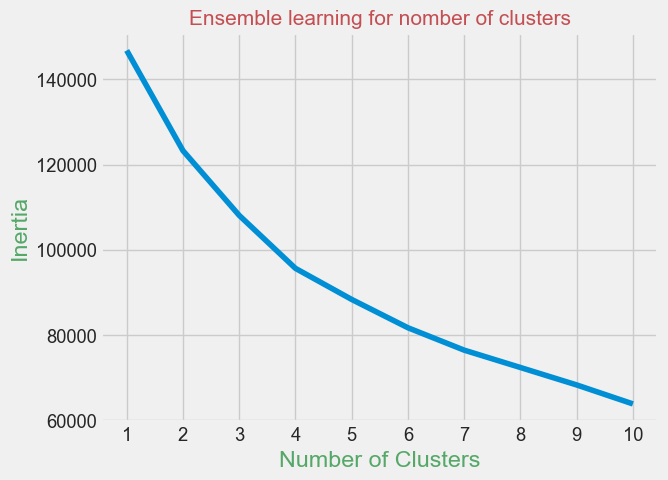

In [135]:
plt.style.use("fivethirtyeight")
plt.title('Ensemble learning for nomber of clusters', fontsize=15, color='r')
plt.plot(range(1, 11), list)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters', color='g')
plt.ylabel('Inertia', color='g')
plt.show()

In [136]:
# Silhouette analysis
silhouette_coefficients = []
for k in range(2,11):
    model_kmean3 = KMeans(n_clusters=k, **kmeans_setting)
    model_kmean3.fit(df4)
    score = metrics.silhouette_score(df4, model_kmean3.labels_)
    silhouette_coefficients.append(score)

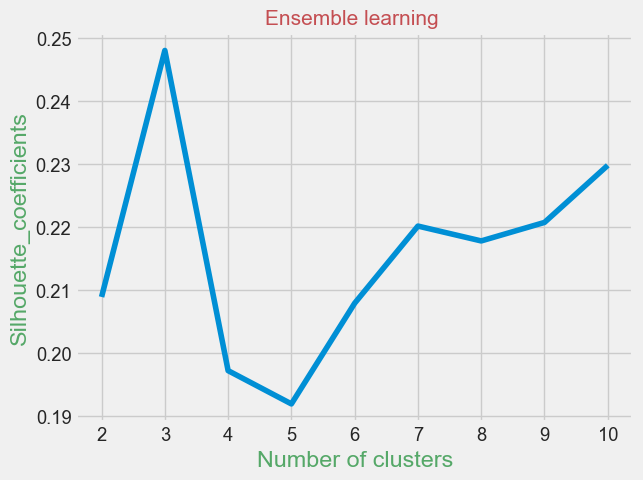

In [137]:
plt.style.use("fivethirtyeight")
plt.title('Ensemble learning ', fontsize=15, color='r')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters', color='g')
plt.ylabel('Silhouette_coefficients', color='g')
plt.show()

In [138]:
optimal_clusters = 3

K_mean algorithm

In [139]:
model_kmeans1 = KMeans(n_clusters=3)
model_kmeans1.fit(X_train)
pred_kmean =  model_kmeans1.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [140]:
model_kmeans2 = KMeans(n_clusters=3).fit(df4)
centroids = model_kmeans2.cluster_centers_
print(centroids)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 0.30832219  0.42001262  1.5099337   1.26153715  1.25108977 -0.24791809
   1.13358118  1.53595225  0.95838728 -0.36263703 -0.25342148  1.66762018
   0.8893863   0.82418004  0.16930037  0.47063274  0.29543716]
 [-0.36839031 -0.16982168 -0.23350262 -0.20456896 -0.17601035 -0.31239516
  -0.05952581 -0.23359701 -0.04815275 -0.33644756 -0.30157999 -0.24493022
  -0.3422927  -0.28771036 -0.13656871  0.01542249 -0.02402295]
 [ 1.14576392  0.31196859 -0.29652996 -0.21209248 -0.31138371  1.36793447
  -0.65809791 -0.31641901 -0.56456451  1.5476634   1.33153646 -0.37623634
   0.59549637  0.44092569  0.38196122 -0.42419177 -0.13950909]]


AgglomerativeClustering Algorithm

In [141]:
model_AgglomerativeClustering1 = AgglomerativeClustering()
model_AgglomerativeClustering1.fit(X_train)

AgglomerativeClustering()

In [142]:
model_AgglomerativeClustering = AgglomerativeClustering()
model_AgglomerativeClustering.fit(df4)

AgglomerativeClustering()

DBSCAN Algorithm

In [143]:
model_DBSCAN1 = DBSCAN()
model_DBSCAN1.fit(X_train)

DBSCAN()

In [144]:
model_DBSCAN = DBSCAN()
model_DBSCAN.fit(df4)

DBSCAN()

Grading the models and choosing the best model for datasets

In [145]:
score_kmean = metrics.silhouette_score(df4, model_kmean3.labels_)
score_AgglomerativeClustering = metrics.silhouette_score(df4, model_AgglomerativeClustering.labels_)
score_DBSCAN = metrics.silhouette_score(df4, model_DBSCAN.labels_)

In [146]:
print('score_kmean : ', score_kmean)
print('score_AgglomerativeClustering : ', score_AgglomerativeClustering)
print('score_DBSCAN : ', score_DBSCAN)

score_kmean :  0.229812633877842
score_AgglomerativeClustering :  0.18418454528547495
score_DBSCAN :  -0.465117752115066


In [147]:
score = {
    'Kmean':[0.21296561862451513],
    'AgglomerativeClustering':[0.18418454528547495],
    'DBSCAN':[-0.465117752115066],
}

In [148]:
df = pd.DataFrame.from_dict(score)

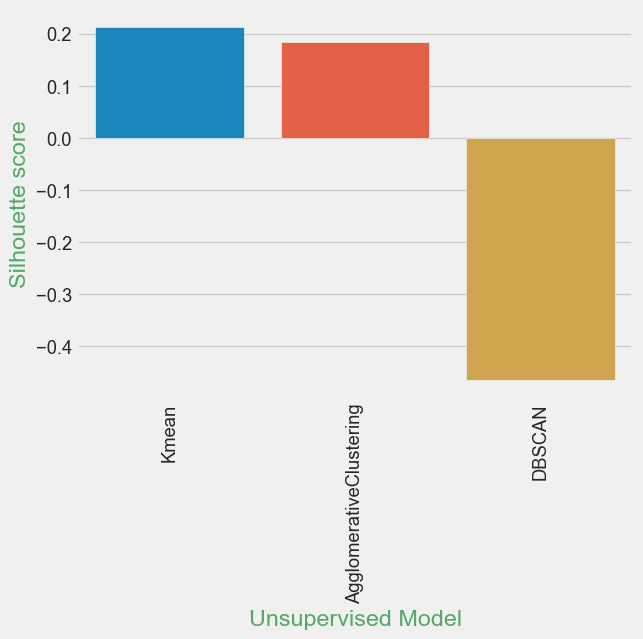

In [149]:
sns.barplot(data=df)
plt.xticks(rotation=90)
plt.xlabel('Unsupervised Model', color='g')
plt.ylabel('Silhouette score', color='g')
plt.show()

Among the clustering methods evaluated, K-Means exhibited the highest silhouette score of 0.2298, indicating the best clustering performance for the given dataset. 

The silhouette score measures how similar an object is to its own cluster compared to other clusters; a higher score suggests well-defined clusters.

In this case, K-Means outperformed Agglomerative Clustering and DBSCAN, signifying that it created distinct, cohesive clusters with minimal overlap. K-Means minimizes intra-cluster distances and maximizes inter-cluster distances, effectively partitioning the data into homogeneous groups. The clear separation between clusters in K-Means indicates that the algorithm successfully captured the underlying patterns in the data, making it the preferred choice. Additionally, K-Means is computationally efficient, making it suitable for larger datasets. Its ability to generate well-defined clusters and its computational efficiency make K-Means the best choice for this dataset, providing valuable insights for further analysis and decision-making in various applications.

## Part 4: Interpreting Clusters:
- Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?

In [150]:
model_kmeans2

KMeans(n_clusters=3)

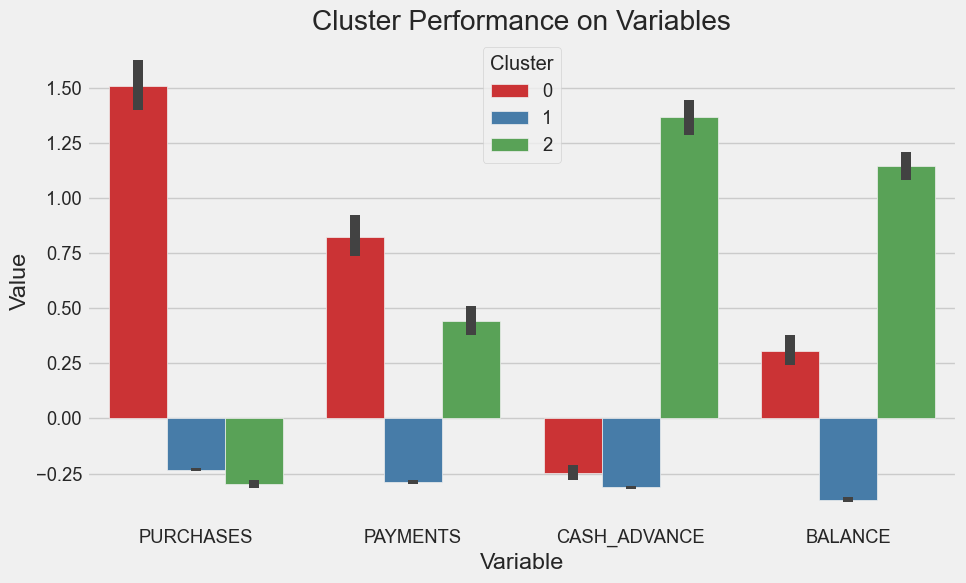

In [151]:
# Get cluster labels for the entire data
cluster_labels = model_kmeans2.labels_

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Select relevant columns for visualization
columns_of_interest = ['PURCHASES', 'PAYMENTS', 'CASH_ADVANCE', 'BALANCE', 'Cluster']

# Melt the DataFrame for easy plotting
melted_data = X.melt(id_vars='Cluster', value_vars=columns_of_interest[:-1], var_name='Variable', value_name='Value')

# Create a grouped bar chart to show cluster performance for each variable
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Value', hue='Cluster', data=melted_data, palette='Set1')
plt.title('Cluster Performance on Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In this customer segmentation, three distinctive clusters emerge, represented by the colors red, blue, and green, each embodying specific financial behaviors. 

The red cluster encompasses customers with the highest purchase activity, reflecting an avid interest in shopping. Despite their active spending, they manage their payments moderately. In contrast, the blue cluster represents individuals with moderate purchase behavior and a penchant for utilizing cash advances, suggesting a reliance on short-term borrowing. This cluster maintains substantial account balances, indicating a strategic approach to finances. Lastly, the green cluster comprises conservative spenders, making fewer purchases and demonstrating prudent payment habits. These customers avoid cash advances, reflecting a cautious approach towards debt, and maintain relatively modest balances.

Among these clusters, the most significant distinguishing features are purchases, payments, cash advances, and account balances. Purchasing behavior is pivotal, differentiating the clusters distinctly. Payments also play a crucial role, with varied levels indicating financial responsibility. Cash advance usage highlights short-term financial strategies, and account balances underscore individual financial prudence. 

Understanding these patterns empowers businesses to tailor their services, providing targeted solutions that resonate with the specific needs and preferences of each cluster, ultimately enhancing customer satisfaction and loyalty.

## Part 5: Actionable Insights:
- Provide business recommendations based on the clusters formed. How would you target different customer segments?

Based on the identified customer clusters, businesses can implement tailored strategies to cater to each segment effectively.

For the <b>Red Cluster</b> (high purchase, moderate payments), businesses should focus on enhancing their shopping experience with personalized product recommendations and loyalty rewards. Offering flexible payment plans can encourage them to spend more.

The <b>Blue Cluster</b> (moderate purchase, cash advances, substantial balances) represents financially strategic customers. Businesses can provide exclusive cash advance offers with low interest rates, coupled with financial planning tools. Encouraging them to invest surplus balances or offering premium banking services can foster loyalty.

The <b>Green Cluster</b> (conservative spenders, prudent payers) prefers stability. Businesses can target them with savings-oriented products, emphasizing security and low-risk investments. Providing educational resources on wealth management and offering bonuses for maintaining modest balances can attract and retain this segment.

By understanding and catering to these diverse financial behaviors, businesses can create personalized marketing campaigns, product offerings, and customer service initiatives. This targeted approach not only enhances customer satisfaction but also strengthens brand loyalty, driving long-term profitability and customer engagement.